<a href="https://colab.research.google.com/github/kelion-aquino/machine-learning-av1/blob/develop/Parte_2_Modelos_de_Classifica%C3%A7%C3%A3o_e_Dados_Risco_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Modelos de Classificacao e Dados - Risco de Credito
# Autora: Kelion Fernandes Aquino

In [ ]:
# Importando as Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score  # Mostra a acuracia e a precisao
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
# Leitura do arquivo dados_limitecredito.csv
df = pd.read_csv("dados_limitecredito.csv")

In [ ]:
# Listando os nomes das colunas
df.columns

Index(['ID', 'historico_credito', 'divida', 'garantias', 'renda', 'Risco'], dtype='object')

In [ ]:
# Definicao dos atributos que deverao ser treinados para gerar o modelo de classificacao
data_treino = np.array(df[["historico_credito", "divida", "garantias", "renda"]])
# Definição do atributo de classificacao
data_classif = np.array(df["Risco"])

In [ ]:
# Verificando o formato dos dados
df.shape

(14, 6)

In [ ]:
# Identificando a correlacao entre as variaveis
# Correlacao nao implica causalidade
def plot_corr(df, size=10):
    corr = df.corr()    
    fig, ax = plt.subplots(figsize = (size, size))
    ax.matshow(corr)  
    plt.xticks(range(len(corr.columns)), corr.columns) 
    plt.yticks(range(len(corr.columns)), corr.columns) 

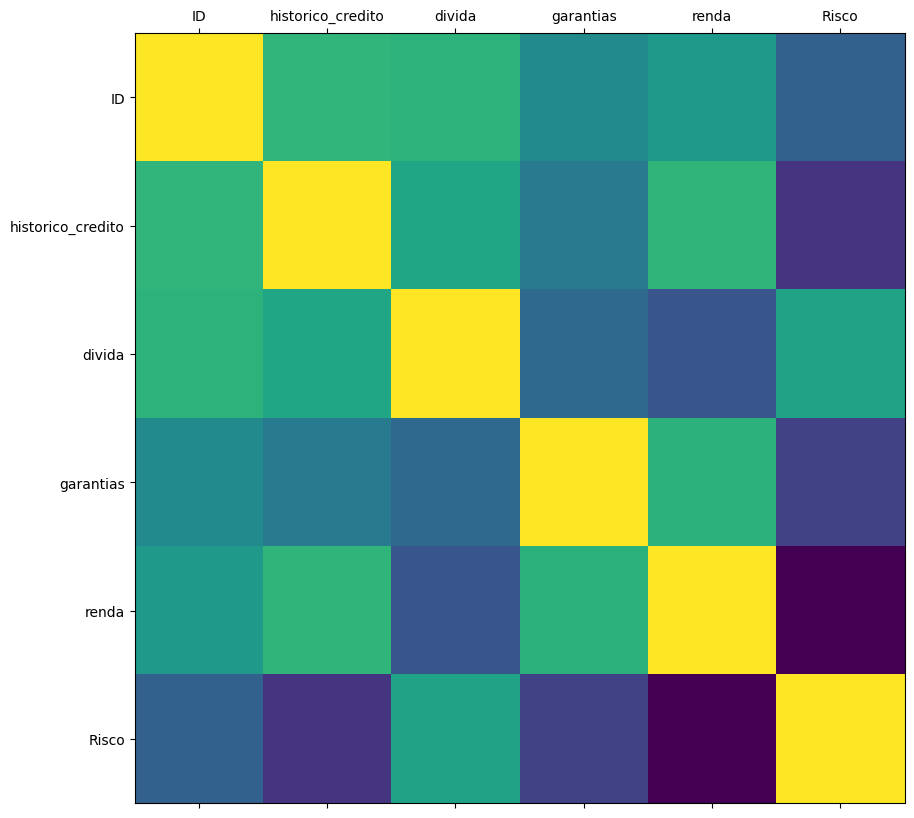

In [ ]:
# Criando o grafico
plot_corr(df)

In [ ]:
# Spliting = 70% para dados de treino e 30% para dados de teste
# Definicao dos conjuntos de treinamento e validacao
x_treino, x_val, y_treino, y_val = train_test_split(data_treino, data_classif, test_size=0.30)

In [ ]:
# Apresentacao dos dados selecionados para o conjunto de treinamento e validacao
print("-----------------------")
print("Conjunto de Treinamento")
print(x_treino)
print("Conjunto de Validacao")
print(x_val)
print("-----------------------")

-----------------------
Conjunto de Treinamento
[[    2     2     1 28000]
 [    2     1     1 29000]
 [    2     1     1 38900]
 [    1     1     2 43222]
 [    2     1     1 40000]
 [    2     1     2 40000]
 [    1     1     1 12000]
 [    3     2     2 45600]
 [    3     1     1 56000]]
Conjunto de Validacao
[[    1     2     1 23780]
 [    3     2     1 56709]
 [    1     2     1 10000]
 [    3     2     1 20000]
 [    3     2     1  9000]]
-----------------------


In [ ]:
# Imprimindo os resultados
print("{0:0.2f}% nos dados de treino".format((len(x_treino)/len(df.index)) * 100))
print("{0:0.2f}% nos dados de teste".format((len(x_val)/len(df.index)) * 100))

64.29% nos dados de treino
35.71% nos dados de teste


In [ ]:
# Treinamento do modelo com os dados atribuidos ao conjunto de treinamento
modelo_NB = GaussianNB()
modelo_NB.fit(x_treino, y_treino)

# Metodo fit treina o modelo
# Metodo predict testa e avalia o modelo

GaussianNB()

In [ ]:
# Predição e acurácia para o conjunto de treinamento
print("Predicao para o conjunto de treinamento")
y_pred_treino = modelo_NB.predict(x_treino)
print("Acuracia para o conjunto de treinamento")
print(accuracy_score(y_treino, y_pred_treino))
print("Na Base de Treinamento")

Predicao para o conjunto de treinamento
Acuracia para o conjunto de treinamento
0.7777777777777778
Na Base de Treinamento


In [ ]:
# Predição e acurácia para o conjunto de validação
print("Predicao para o conjunto de validacao")
y_pred_val = modelo_NB.predict(x_val)
print("Acuracia para o conjunto de validacao")
print(accuracy_score(y_val, y_pred_val))
print("na Base de Teste e ou Validação")

Predicao para o conjunto de validacao
Acuracia para o conjunto de validacao
0.8
na Base de Teste e ou Validação


In [ ]:
# Criando uma Confusion Matrix
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, y_pred_val, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, y_pred_val, labels = [1, 0]))

Confusion Matrix
[[1 0]
 [0 0]]

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           0       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00         1
   macro avg       0.50      0.50      0.50         1
weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
modelo_v2 = RandomForestClassifier(random_state = 42)
modelo_v2.fit(x_treino, y_treino.ravel())

RandomForestClassifier(random_state=42)

In [ ]:
# Verificando os dados de treino
rf_predict_train = modelo_v2.predict(x_treino)
print("Exatidão (Accuracy): {0:.4f}".format(metrics.accuracy_score(y_treino, rf_predict_train)))

Exatidão (Accuracy): 1.0000


In [ ]:
# Verificando nos dados de teste
rf_predict_test = modelo_v2.predict(x_val)
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, rf_predict_test)))
print()

Exatidão (Accuracy): na Base de Teste 0.8000



In [ ]:
# Validação do Modelo com a Matrix de Confusão
print("Confusion Matrix")

print("{0}".format(metrics.confusion_matrix(y_val, rf_predict_test, labels = [1, 0])))
print("")

print("Classification Report")
print(metrics.classification_report(y_val, rf_predict_test, labels = [1, 0]))

Confusion Matrix
[[1 0]
 [0 0]]

Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         1
           0       0.00      0.00      0.00         0

   micro avg       1.00      1.00      1.00         1
   macro avg       0.50      0.50      0.50         1
weighted avg       1.00      1.00      1.00         1



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1

In [ ]:
# Regressão Logística
modelo_v3 = LogisticRegression(C = 0.7, random_state = 42)
modelo_v3.fit(x_treino, y_treino.ravel())
lr_predict_test = modelo_v3.predict(x_val)

In [ ]:
print("Exatidão (Accuracy): na Base de Teste {0:.4f}".format(metrics.accuracy_score(y_val, lr_predict_test)))
print()
print("Classification Report")
print(metrics.classification_report(y_val, lr_predict_test, labels = [1, 0]))

Exatidão (Accuracy): na Base de Teste 0.2000

Classification Report
              precision    recall  f1-score   support

           1       0.20      1.00      0.33         1
           0       0.00      0.00      0.00         0

   micro avg       0.20      1.00      0.33         1
   macro avg       0.10      0.50      0.17         1
weighted avg       0.20      1.00      0.33         1



/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1